## 15.12.2023 X-ray diffraction

We begin by loading the libraries you will require later on for your calculations.

In [1]:
# import required libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

Further you need to install the library pyFAI that we will use in the remainder of this notebook.

In [9]:
pip install ipywidgets --upgrade

Note: you may need to restart the kernel to use updated packages.


### Exercise 1

In the first instance, go to the [pyFAI cookbook](https://pyfai.readthedocs.io/en/v2023.1/usage/cookbook/calibration_with_jupyter.html) and copy the different cells into this notebook to try and recreate the calibration of the diffraction detector as described in the cookbook.

Please note that you may need to select a different matplotlib interface (nbagg, widget or inline), depending on which environment you are using. Further, when you get to the stage where you should select the rings on the detector, make sure that you start at number 0 for the innermost diffraction ring. Discuss and describe the different steps you are performing in your own words to make sure you understand the process.

In [6]:
# The notebook interface (nbagg) is needed in jupyter-notebook while the widget is recommended for jupyer lab
#%matplotlib nbagg
%matplotlib widget
# For the integration in the documentation, one uses
#%matplotlib inline

import pyFAI
import pyFAI.test.utilstest
import fabio
from matplotlib.pyplot import subplots
from pyFAI.gui import jupyter
from pyFAI.gui.jupyter.calib import Calibration

print(f"PyFAI version {pyFAI.version}")

ValueError: Key backend: 'module://ipympl.backend_nbagg' is not a valid value for backend; supported values are ['gtk3agg', 'gtk3cairo', 'gtk4agg', 'gtk4cairo', 'macosx', 'nbagg', 'notebook', 'qtagg', 'qtcairo', 'qt5agg', 'qt5cairo', 'tkagg', 'tkcairo', 'webagg', 'wx', 'wxagg', 'wxcairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template', 'inline']

In [7]:
# Some parameters like the wavelength, the calibrant and the diffraction image:
wavelength = 12.345e-10/19.8
pilatus = pyFAI.detector_factory("Eiger9M")
Lab6 = pyFAI.calibrant.CALIBRANT_FACTORY("LaB6")
Lab6.wavelength = wavelength

#load some test data (requires an internet connection)
img = fabio.open("students_berit/lab_aver2.tiff").data

calib = Calibration(img, calibrant=Lab6, wavelength=wavelength, detector=pilatus)

<Figure size 640x480 with 0 Axes>

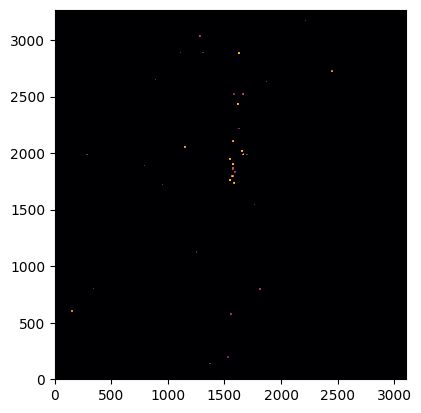

In [4]:
# Simply display the scattering image:
_ = jupyter.display(img)

In [5]:
calib = Calibration(img, calibrant=AgBh, wavelength=wavelength, detector=pilatus)
# This displays the calibration widget:

# 1. Set the ring number (0-based value), below the plot
# 2. Pick the ring by right-clicking with the mouse on the image.
# 3. Restart at 1. for at least a second ring
# 4. Click refine to launch the calibration.

In [6]:
# This is the calibrated geometry:
gr = calib.geoRef
print(gr)
print(f"Fixed parameters: {calib.fixed}")
print(f"Cost function: {gr.chi2()}")

Detector Pilatus 1M	 PixelSize= 1.720e-04, 1.720e-04 m
Wavelength= 1.000000e-10 m
SampleDetDist= 1.634254e+00 m	PONI= 4.038549e-02, 2.116814e-02 m	rot1=-0.005981  rot2=0.003082  rot3=0.000000 rad
DirectBeamDist= 1634.291 mm	Center: x=179.900, y=264.082 pix	Tilt= 0.386° tiltPlanRotation= 27.261° 𝛌= 1.000Å
Fixed parameters: ['wavelength', 'rot3']
Cost function: 3.0793052369657144e-07


In [7]:
# re-extract all control points using the "massif" algorithm
calib.extract_cpt()

In [8]:
# remove the last ring since it is outside the flight-tube
calib.remove_grp(lbl="f")

In [9]:
#Those are all control points: the last column indicates the ring number
calib.geoRef.data

array([[372.30766833, 300.31343257,   0.        ],
       [275.99740601, 341.96221924,   0.        ],
       [229.9456742 ,  20.50710648,   0.        ],
       ...,
       [ 64.01691437, 971.00195312,   4.        ],
       [704.05892533, 866.9590308 ,   4.        ],
       [424.        , 980.        ,   4.        ]])

In [10]:
# This is the geometry with all rings defined:
gr = calib.geoRef
print(gr)
print(f"Fixed parameters: {calib.fixed}")
print(f"Cost function: {gr.chi2()}")

Detector Pilatus 1M	 PixelSize= 1.720e-04, 1.720e-04 m
Wavelength= 1.000000e-10 m
SampleDetDist= 1.634254e+00 m	PONI= 4.038549e-02, 2.116814e-02 m	rot1=-0.005981  rot2=0.003082  rot3=0.000000 rad
DirectBeamDist= 1634.291 mm	Center: x=179.900, y=264.082 pix	Tilt= 0.386° tiltPlanRotation= 27.261° 𝛌= 1.000Å
Fixed parameters: ['wavelength', 'rot3']
Cost function: 8.929668050884168e-07


In [11]:
# Geometry refinement with some constrains: SAXS mode
# Here we enforce all rotation to be null and fit again the model:

gr.rot1 = gr.rot2 = gr.rot3 = 0
gr.refine3(fix=["rot1", "rot2", "rot3", "wavelength"])
print(gr)
print(f"Cost function = {gr.chi2()}")

Detector Pilatus 1M	 PixelSize= 1.720e-04, 1.720e-04 m
Wavelength= 1.000000e-10 m
SampleDetDist= 1.635060e+00 m	PONI= 4.542011e-02, 3.093441e-02 m	rot1=0.000000  rot2=0.000000  rot3=0.000000 rad
DirectBeamDist= 1635.060 mm	Center: x=179.851, y=264.070 pix	Tilt= 0.000° tiltPlanRotation= 0.000° 𝛌= 1.000Å
Cost function = 9.58175918255939e-07


In [12]:
gr.save("jupyter.poni")
gr.get_config()

OrderedDict([('poni_version', 2),
             ('detector', 'Pilatus1M'),
             ('detector_config', OrderedDict()),
             ('dist', 1.635060352554334),
             ('poni1', 0.04542010767902502),
             ('poni2', 0.03093440614502472),
             ('rot1', 0.0),
             ('rot2', 0.0),
             ('rot3', 0.0),
             ('wavelength', 1e-10)])

In [13]:
# Create a "normal" azimuthal integrator (without fitting capabilities from the geometry-refinement object)
ai = pyFAI.load(gr)
ai

Detector Pilatus 1M	 PixelSize= 1.720e-04, 1.720e-04 m
Wavelength= 1.000000e-10 m
SampleDetDist= 1.635060e+00 m	PONI= 4.542011e-02, 3.093441e-02 m	rot1=0.000000  rot2=0.000000  rot3=0.000000 rad
DirectBeamDist= 1635.060 mm	Center: x=179.851, y=264.070 pix	Tilt= 0.000° tiltPlanRotation= 0.000° 𝛌= 1.000Å

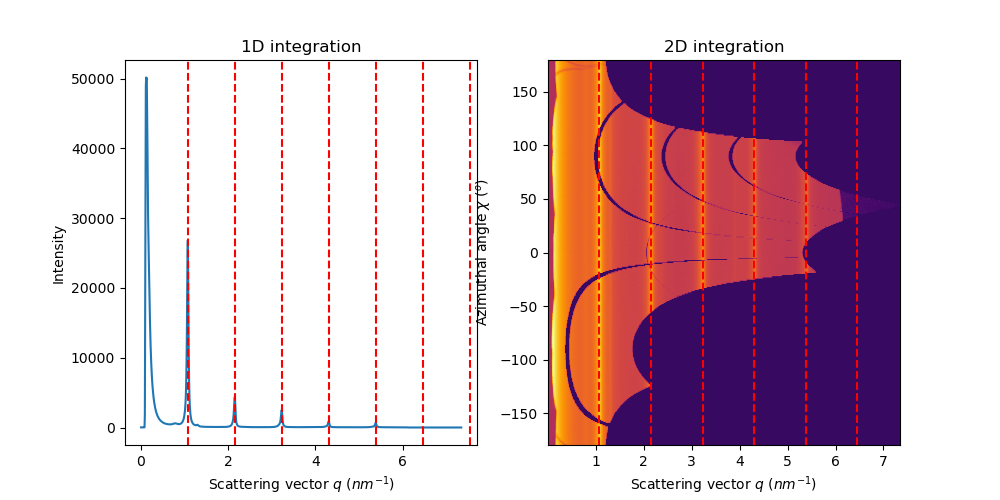

In [14]:
# Display the integrated data to validate the calibration.
fig, ax = subplots(1, 2, figsize=(10, 5))
jupyter.plot1d(ai.integrate1d(img, 1000),  calibrant=AgBh, ax=ax[0])
jupyter.plot2d(ai.integrate2d(img, 1000),  calibrant=AgBh, ax=ax[1])
_ = ax[1].set_title("2D integration")

### Exercise 2

In this exercise, you will first perform another detector calibration and then continue to integrate data from a recent experiment.
The diffraction experiment was performed at an X-ray energy of 87.1 keV. The detector calibration data is given in the file _Lab6-00001.tif'_. In this case, the detector was a PerkinElmer detector and the calibrant was LaB6. Start by loading the data similar to above.
The data used in this exercise is courtesy of Dr. Florian Wieland at Helmholtz-Zentrum Hereon.

In [4]:
E=87100
c = 300e6
h = 4.136e-15
wavelength = c*h/E
pilatus = pyFAI.detector_factory("PerkinElmer")
Lab6 = pyFAI.calibrant.CALIBRANT_FACTORY("LaB6")
Lab6.wavelength = wavelength

img = fabio.open('students_berit/Lab6-00001.tif').data

Display the detector image

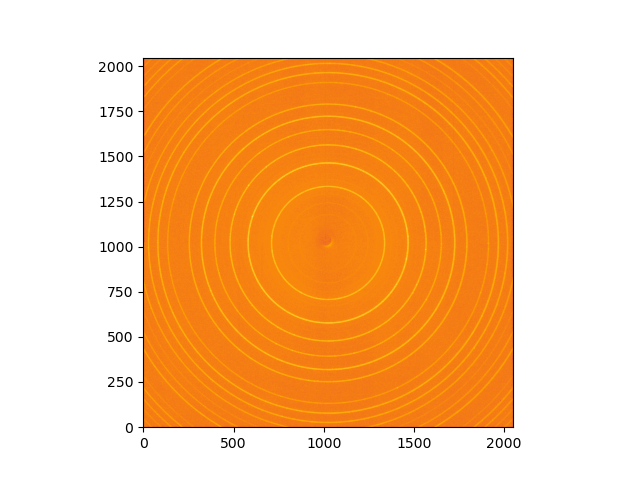

In [5]:
# Simply display the scattering image:
_ = jupyter.display(img)

Now perform the calibration as you did before.

In [7]:
calib = Calibration(img, calibrant=Lab6, wavelength=wavelength, detector=pilatus)
# This displays the calibration widget:

# 1. Set the ring number (0-based value), below the plot
# 2. Pick the ring by right-clicking with the mouse on the image.
# 3. Restart at 1. for at least a second ring
# 4. Click refine to launch the calibration.

Extract the calibrated geometry. Note that in this instance we will not perform any changes to the initial geometry, as no flight tube was used and we assume that a detector tilt is possible.

In [8]:
# This is the calibrated geometry:
gr = calib.geoRef
print(gr)
print(f"Fixed parameters: {calib.fixed}")
print(f"Cost function: {gr.chi2()}")

Detector Perkin detector	 PixelSize= 2.000e-04, 2.000e-04 m
Wavelength= 1.424569e-11 m
SampleDetDist= 1.825328e+00 m	PONI= 2.036553e-01, 1.952951e-01 m	rot1=-0.005236  rot2=0.000054  rot3=0.000000 rad
DirectBeamDist= 1825.353 mm	Center: x=1024.260, y=1018.768 pix	Tilt= 0.300° tiltPlanRotation= 0.589° 𝛌= 0.142Å
Fixed parameters: ['wavelength', 'rot3']
Cost function: 9.499270708942849e-07


Create the azimuthal integrator as above.

In [9]:
# Create a "normal" azimuthal integrator (without fitting capabilities from the geometry-refinement object)
ai = pyFAI.load(gr)
ai

Detector Perkin detector	 PixelSize= 2.000e-04, 2.000e-04 m
Wavelength= 1.424569e-11 m
SampleDetDist= 1.825328e+00 m	PONI= 2.036553e-01, 1.952951e-01 m	rot1=-0.005236  rot2=0.000054  rot3=0.000000 rad
DirectBeamDist= 1825.353 mm	Center: x=1024.260, y=1018.768 pix	Tilt= 0.300° tiltPlanRotation= 0.589° 𝛌= 0.142Å

And finish by displaying the integrated detector image. This is useful to check that you performed the calibration well. If you notice that the red lines are not coinciding with the major peaks you should go back to the calibration step.

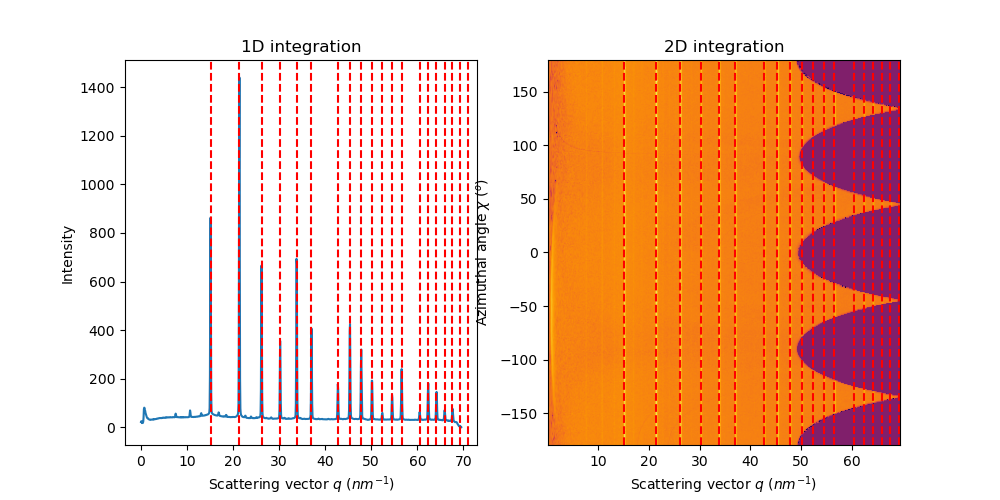

In [10]:
# Display the integrated data to validate the calibration.
fig, ax = subplots(1, 2, figsize=(10, 5))
jupyter.plot1d(ai.integrate1d(img, 1000),  calibrant=Lab6, ax=ax[0])
jupyter.plot2d(ai.integrate2d(img, 1000),  calibrant=Lab6, ax=ax[1])
_ = ax[1].set_title("2D integration")

Following the detector calibration, we wish to load the diffraction data from the actual sample during the experiment. Start by loading both _Mg10Gd_sample4_5_10minus5-00001.tif_ and _Mg10Gd_sample4_5_10minus5-00060.tif_ and display at least one diffraction spectrum. 

<AxesSubplot:title={'center':'1D integration'}, xlabel='Scattering vector $q$ ($nm^{-1}$)', ylabel='Intensity'>

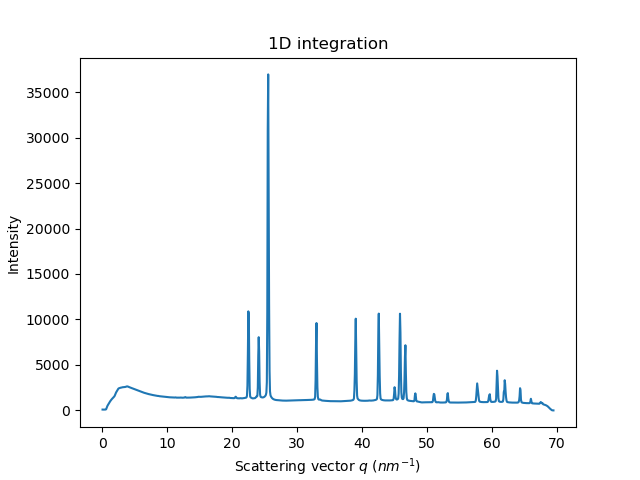

In [11]:
sample1 = fabio.open('students_berit/Sample4/Mg10Gd_sample4_5_10minus5-00001.tif').data
sample60 = fabio.open('students_berit/Sample4/Mg10Gd_sample4_5_10minus5-00060.tif').data
jupyter.plot1d(ai.integrate1d(sample1, 1000))

You should be seeing three larger peaks at q-values between 20 and 30 nm$^{-1}$. We now wish to fit the first of these three peaks and see how its position and width differ between the two images. Start by saving the azimuthal integrations in two arrays.

In [12]:
spectrum1=ai.integrate1d(sample1, 1000)
spectrum60=ai.integrate1d(sample60, 1000)

To perform the fitting, it is useful to narrow down you data to that surrounding the peak (with no further peaks included). Therefore, generate arrays with contain only the peak we wish to fit and display both peaks. How do they differ visually?

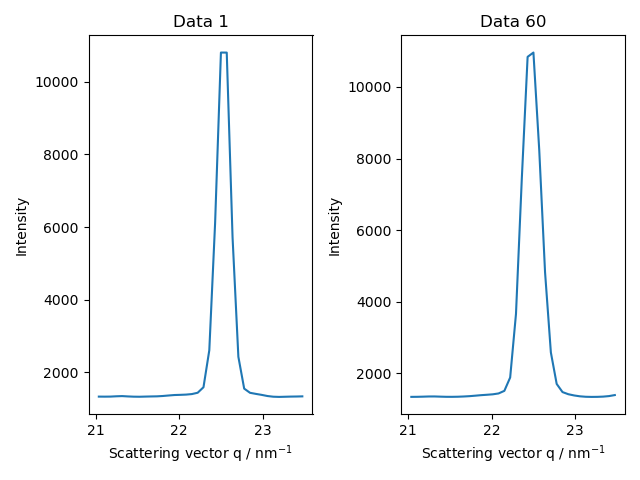

In [28]:
xdata1=spectrum1[0]
xdata1_peak=xdata1[(xdata1>21)&(xdata1<23.5)]
ydata1=spectrum1[1]
ydata1_peak=ydata1[(xdata1>21)&(xdata1<23.5)]
xdata60=spectrum60[0]
xdata60_peak=xdata60[(xdata60>21)&(xdata60<23.5)]
ydata60=spectrum60[1]
ydata60_peak=ydata60[(xdata60>21)&(xdata60<23.5)]
fig,ax=plt.subplots(1,2)
ax[0].plot(xdata1_peak,ydata1_peak)
ax[0].set_xlabel('Scattering vector q / nm$^{-1}$')
ax[0].set_title('Data 1')
ax[0].set_ylabel('Intensity')
ax[1].plot(xdata60_peak,ydata60_peak)
ax[1].set_xlabel('Scattering vector q / nm$^{-1}$')
ax[1].set_ylabel('Intensity')
ax[1].set_title('Data 60')
fig.tight_layout()
plt.show()

The peak for the _60_ sample appears a little broader. In terms of the intensity, no differences are apparent.

In the next step define two functions: 
1. Define a Gauss function which will return the y-values of a Gaussian function given the x-values and the different parameters. Your Gauss function should take the form $$y=C+A*e^{-\frac{(x-x_0)^2}{2\sigma^2}}$$
2. Define a cost function that computes the L2 norm of a given (y)-data and the Gaussian from (1) with given x and parameter values

In [25]:
def gauss(x, params):
    y_g=params[0]+params[1]*np.exp(-(x-params[2])**2/(2*params[3]**2))
    return y_g


# define a function that computes and returns the L2 loss  
def cost_function(params, x, y):
    return np.sqrt(np.sum(np.abs(y - gauss(x, params))**2))

We will now fit two Gaussians using the functions we have defined by using the _scipy_ function _minimize_. Based on the visual appearance above, you should set initial values for the parameters of the Gaussian function. The _output.x_ of the function contains the optimal parameter set. Using these, plot the two original peaks and the fitted Gaussians for a visual comparison. If your fit was successful, these should differ only slightly. 

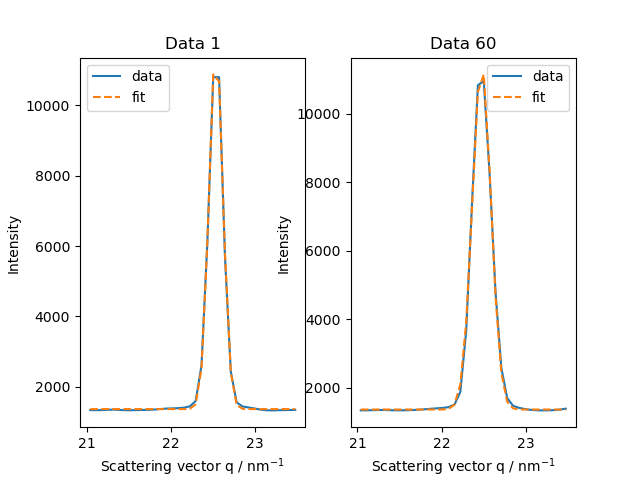

In [29]:
par0=[1500,10000,22.5,0.2]
output1 = minimize(cost_function, par0, args=(xdata1_peak, ydata1_peak))
fit_y1=gauss(xdata1_peak,output1.x)
output60 = minimize(cost_function, par0, args=(xdata60_peak, ydata60_peak))
fit_y60=gauss(xdata60_peak,output60.x)

fig,ax=plt.subplots(1,2)
ax[0].plot(xdata1_peak,ydata1_peak,label='data')
ax[0].plot(xdata1_peak,fit_y1,linestyle='dashed',label='fit')
ax[0].set_xlabel('Scattering vector q / nm$^{-1}$')
ax[0].set_ylabel('Intensity')
ax[0].set_title('Data 1')
ax[0].legend()
ax[1].plot(xdata60_peak,ydata60_peak,label='data')
ax[1].plot(xdata60_peak,fit_y60,linestyle='dashed',label='fit')
ax[1].set_xlabel('Scattering vector q / nm$^{-1}$')
ax[1].set_ylabel('Intensity')
ax[1].set_title('Data 60')
ax[1].legend()
plt.show()

Finally, determine the lattice spacing of the peaks that you have fitted. Which Mg-peak are we assessing? How much do the lattice spacings and the FWHM differ between the two measurements? How are you interpreting the results?

In [30]:
d1_peak=2*np.pi/output1.x[2]
print('The peak position fitted for diffractogram 1 is', np.round(d1_peak,4), 'Angström.')
fwhm1=2*np.sqrt(2*np.log(2))*output1.x[3]
print('The full width at half maximum for diffractogram 1 is', np.round(fwhm1,3))

d60_peak=2*np.pi/output60.x[2]
print('The peak position fitted for diffractogram 60 is', np.round(d60_peak,4), 'Angström.')
fwhm60=2*np.sqrt(2*np.log(2))*output60.x[3]
print('The full width at half maximum for diffractogram 60 is', np.round(fwhm60,3))

The peak position fitted for diffractogram 1 is 0.2788 Angström.
The full width at half maximum for diffractogram 1 is 0.194
The peak position fitted for diffractogram 60 is 0.2796 Angström.
The full width at half maximum for diffractogram 60 is 0.26


The fitted peak is the Mg (100) peak. The peak can be checked [here](http://rruff.geo.arizona.edu/AMS/amcsd.php). The peak position is differing only slightly, yet the FWHM has changed significantly, which coincides with what we observed visually. The broadening of the peak is due to a strain that is introduced on the crystal lattice, as the experiment at hand is a tensile test. "Data 1" is at 0 N tensile load and "Data 60" at 5.26kN.